<a href="https://colab.research.google.com/github/Inaracrewc/Birds/blob/main/23.03.21%20Times_series_Sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()


     |████████████████████████████████| 727kB 7.7MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
     |████████████████████████████████| 194kB 14.4MB/s 
     |████████████████████████████████| 1.2MB 14.9MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
     |████████████████████████████████| 776.8MB 22kB/s 
     |████████████████████████████████| 12.8MB 319kB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [ ]:
!pip install statsmodels
!conda install -c conda-forge statsmodels
!git clone git://github.com/statsmodels/statsmodels.git
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import pandas_datareader as pdr
import seaborn as sns
import statsmodels.tsa.ar_model
import statsmodels.tsa.api
import numpy as np
import statsmodels.api as sm
#import statsmodels.tsa.arima.model
import statsmodels.graphics.api
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()
from statsmodels.tsa.stattools import adfuller

# **FAILED ATTEMPTS**

In [56]:
precovid_invoices = pd.read_csv('/content/gdrive/MyDrive/SALES_PREDICTION/17.03 PRECOVID Overzicht facturen_by month - Sheet1.csv')

In [57]:
print(precovid_invoices.shape)
pd.DataFrame(precovid_invoices.dtypes)

(24, 6)


,0
Invoice_id,int64
order_id,int64
date,object
Customer_code,int64
Amount,int64
Is_holiday month,float64


In [58]:
precovid_invoices.head()

,Invoice_id,order_id,date,Customer_code,Amount,Is_holiday month
0,86423,10001,3-04-18,11846,39353,1.0
1,86507,150862,1-05-18,12806,54942,1.0
2,86611,11065,4-06-18,10819,58908,NaN
3,86661,11206,2-07-18,10662,58512,NaN
4,86769,151252,3-08-18,14413,50912,NaN


In [59]:
precovid_invoices.drop(['Invoice_id','order_id','Customer_code', 'Is_holiday month'],axis=1, inplace=True)

In [60]:
precovid_invoices.head()

,date,Amount
0,3-04-18,39353
1,1-05-18,54942
2,4-06-18,58908
3,2-07-18,58512
4,3-08-18,50912


In [61]:
precovid_invoices.dtypes

date      object
Amount     int64
dtype: object

In [62]:
precovid_invoices['date'] = pd.to_datetime(precovid_invoices.date)

In [63]:
precovid_invoices.set_index('date', inplace=True)

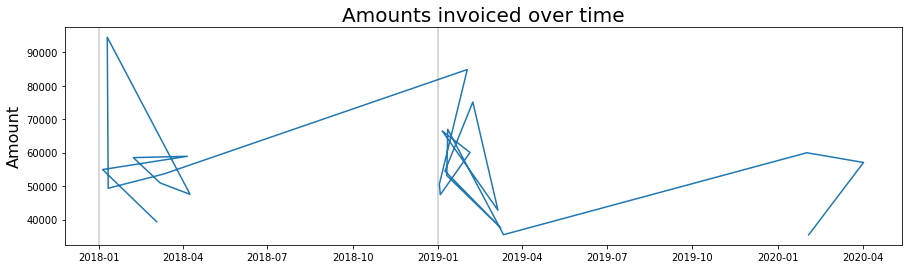

In [64]:
plt.figure(figsize=(15,4))
plt.plot(precovid_invoices.Amount)
plt.title('Amounts invoiced over time', fontsize=20)
plt.ylabel('Amount', fontsize=16)
for year in range(2018,2020):
    plt.axvline(pd.to_datetime(str(year)), color='k', linestyle='-', alpha=0.2)


# **New approach**
 https://www.analyticsvidhya.com/blog/2020/10/how-to-create-an-arima-model-for-time-series-forecasting-in-python/

# **Monthly based data approach**

In [100]:
df=pd.read_csv('/content/gdrive/MyDrive/SALES_PREDICTION/17.03 PRECOVID Overzicht facturen_by month - Sheet1.csv')
df.head()

,Invoice_id,order_id,date,Customer_code,Amount,Is_holiday month
0,86423,10001,3-04-18,11846,39353,1.0
1,86507,150862,1-05-18,12806,54942,1.0
2,86611,11065,4-06-18,10819,58908,NaN
3,86661,11206,2-07-18,10662,58512,NaN
4,86769,151252,3-08-18,14413,50912,NaN


In [101]:
df.drop(['Invoice_id','order_id','Customer_code', 'Is_holiday month'],axis=1, inplace=True)

In [102]:
# Updating the header
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,3-04-18,39353
1,1-05-18,54942
2,4-06-18,58908
3,2-07-18,58512
4,3-08-18,50912


In [103]:
df.describe()

,Sales
count,24.000000
mean,55626.083333
std,14537.592337
min,35394.000000
25%,47508.500000
50%,54073.500000
75%,59988.750000
max,94519.000000


In [104]:
df.set_index('Month',inplace=True)

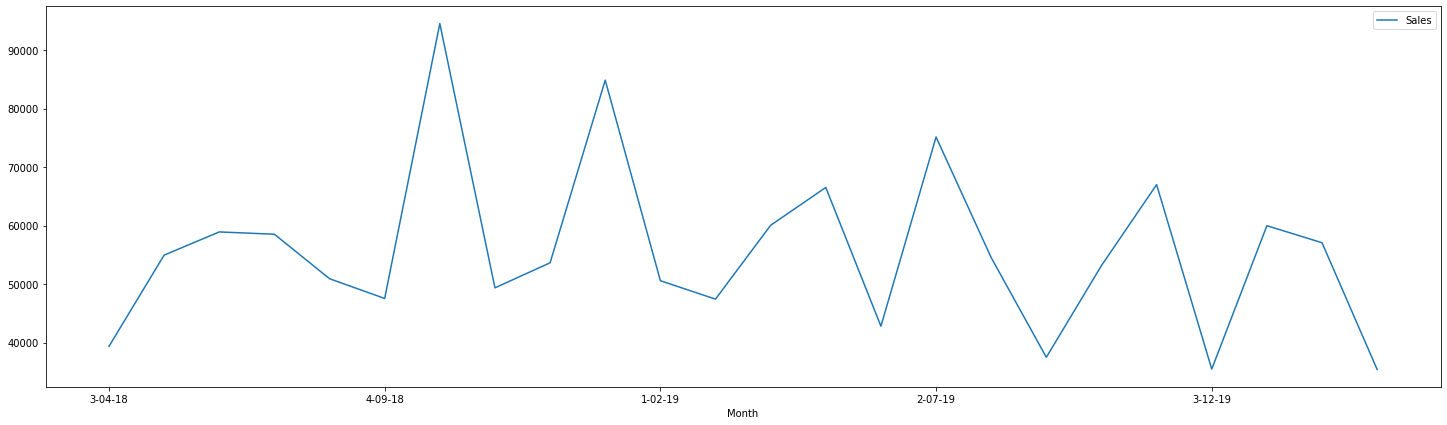

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 25, 7
df.plot()

# **Daily based data approach**

In [72]:
df1=pd.read_csv('/content/gdrive/MyDrive/SALES_PREDICTION/17.03 PRECOVID Overzicht facturen_ order - Sheet1-9.csv')
df1.head()

,Invoice_id,order_id,date,Customer_code,Amount,Is_holiday month
0,86423,10001,3-04-18,11846,622.99,1.0
1,86425,10003,4-04-18,11215,25.00,1.0
2,86424,10002,4-04-18,13287,1735.30,1.0
3,86427,10005,5-04-18,11215,1450.00,1.0
4,86426,10004,5-04-18,12801,369.70,1.0


In [73]:
df1.drop(['Invoice_id','order_id','Customer_code', 'Is_holiday month'],axis=1, inplace=True)

In [74]:
df1.columns=["Month","Sales"]
df1.head()

,Month,Sales
0,3-04-18,622.99
1,4-04-18,25.00
2,4-04-18,1735.30
3,5-04-18,1450.00
4,5-04-18,369.70


In [75]:
df1.set_index('Month',inplace=True)

In [76]:
df1.describe()

,Sales
count,2561.000000
mean,521.357329
std,1075.670529
min,1.500000
25%,98.500000
50%,203.500000
75%,430.000000
max,14750.400000


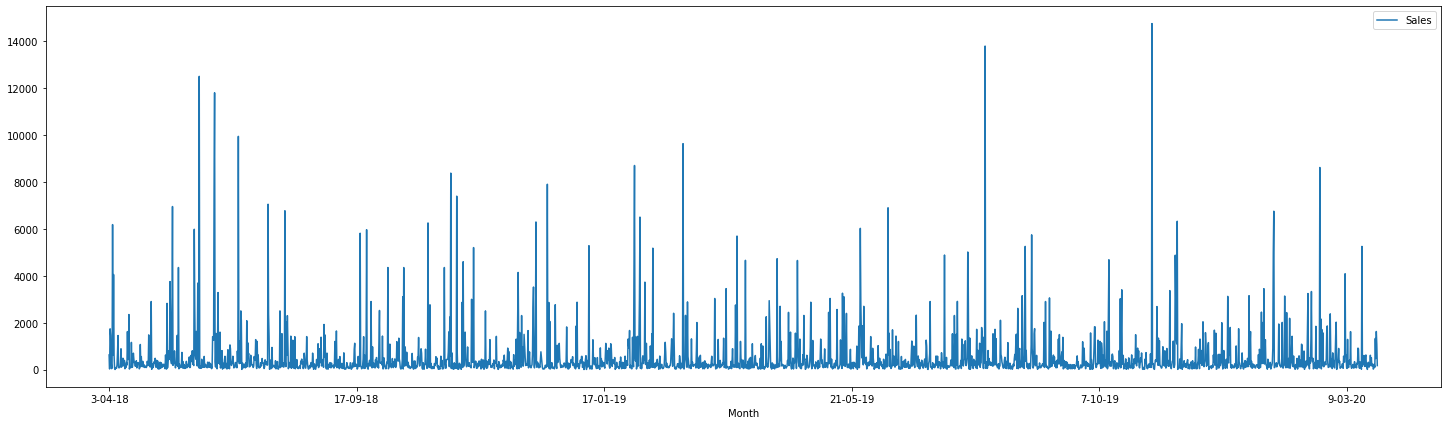

In [77]:
from pylab import rcParams
rcParams['figure.figsize'] = 25, 7
df1.plot()

# **Coming back to "months approach"**

In [80]:
test_result=adfuller(df['Sales'])

In [48]:
def adfuller_test(sales):
    test_result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(test_result,labels):
        print(label+' : '+str(value) )

if test_result[1] <= 0.05:
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
else:
    print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(df['Sales'])

weak evidence against null hypothesis,indicating it is non-stationary 
ADF Test Statistic : 0.45186187446335685
p-value : 0.9833341572597561
#Lags Used : 9
Number of Observations : 14


# **Seasonality**

In [49]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)
df.head()

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
3-04-18,39353,NaN,NaN
1-05-18,54942,15589.0,NaN
4-06-18,58908,3966.0,NaN
2-07-18,58512,-396.0,NaN
3-08-18,50912,-7600.0,NaN


In [50]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.2625738117118934
p-value : 0.016636593350350348
#Lags Used : 1
Number of Observations : 10


In [ ]:
#Here P-value is 2.06, which means we will be rejecting the null hypothesis. So data is stationary.

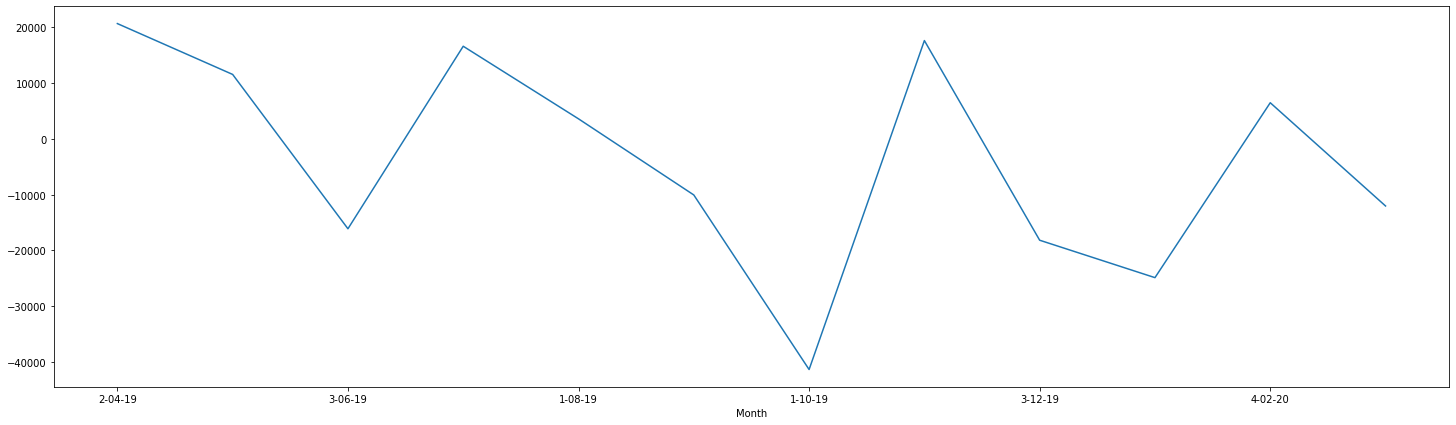

In [52]:
from pylab import rcParams
rcParams['figure.figsize'] = 25, 7
df['Seasonal First Difference'].plot()

# **Autocorrelation**

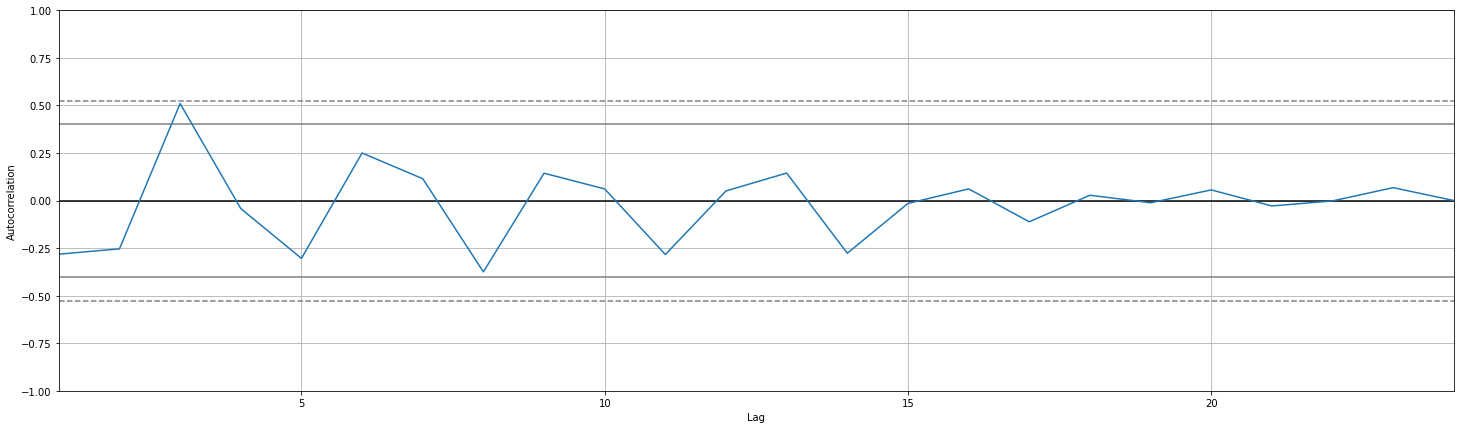

In [82]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [89]:
df['Sales'].shape

(24,)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


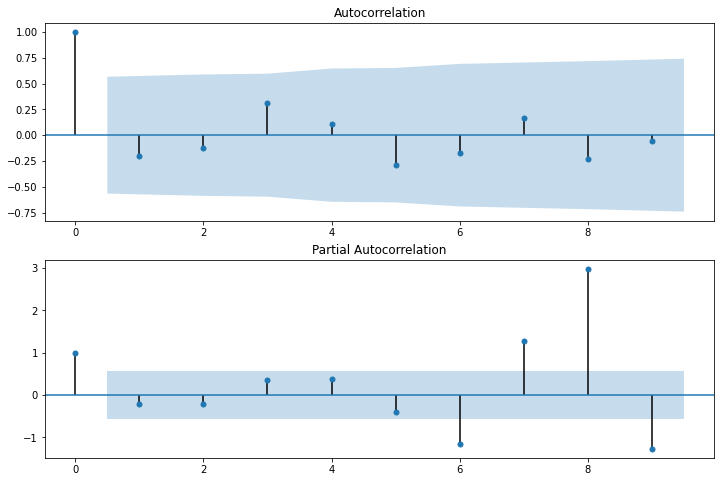

In [90]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].dropna(),lags=9,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].dropna(),lags=9,ax=ax2)

In [91]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                   23
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -253.393
Method:                       css-mle   S.D. of innovations          13565.893
Date:                Tue, 23 Mar 2021   AIC                            514.786
Time:                        03:02:56   BIC                            519.328
Sample:                             1   HQIC                           515.928
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -305.1857    313.545     -0.973      0.342    -919.723     309.352
ar.L1.D.Sales    -0.3152      0.210     -1.499      0.150      -0.727       0.097
ma.L1.D.Sales    -1.0000      0.157     -6.362      0.000      -1.308      -0.692
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.1727           +0.0000j            3.1727            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

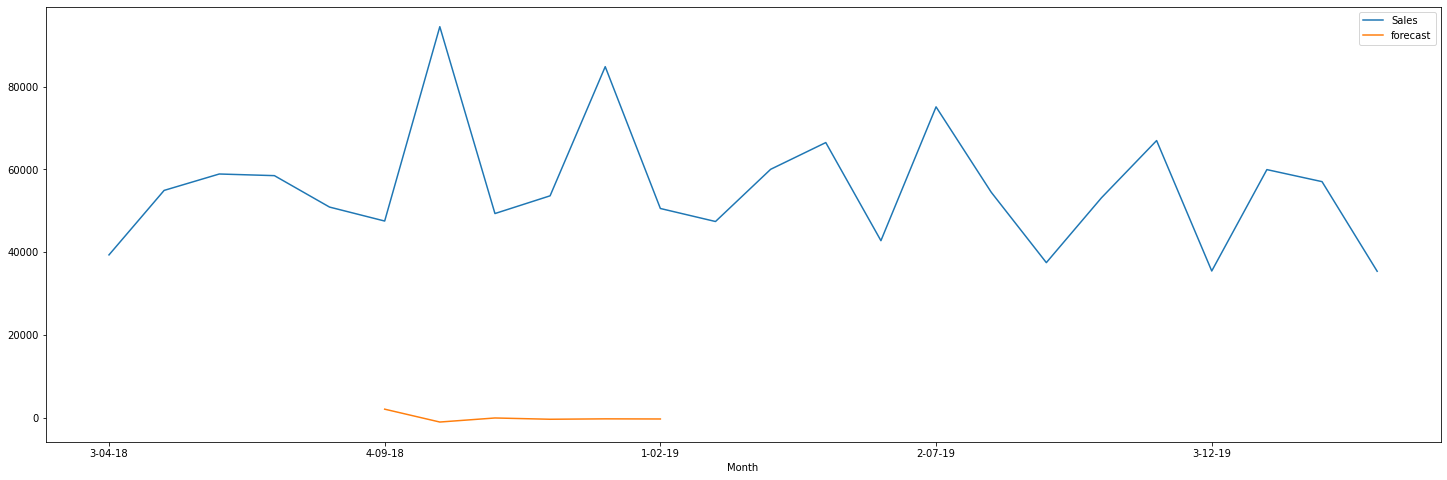

In [97]:
df['forecast']=model_fit.predict(start=5,end=10,dynamic=True)
df[['Sales','forecast']].plot(figsize=(25,8))

In [105]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

future_datest_df.tail()

future_df=pd.concat([df,future_datest_df])

future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))

TypeError: ignored